In [16]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import pandas
from io import StringIO
import networkx as nx


In [3]:
TP = "../src/tp"
TEST_DIR = "../tests/"

def run_test(test_name: str, niter: int, eps: float): 
    !{TP} {TEST_DIR + test_name} {niter} {eps}

# def absolute_error(test_result: str, expected_result: str):
#     test_table = read_result(test_result)
#     expected_table = read_result(expected_result)
#     return abs(test_table - expected_table)

def read_result_autovalores(test_result: str):
    return pandas.read_csv(TEST_DIR + test_result + '_autovalores.out', names=["autovalores"])

def read_result_autovectores(test_result: str):
    return pandas.read_csv(TEST_DIR + test_result + '_autovectores.out' , names=["autovectores"])

## 2. KARATE CLUB

In [35]:
run_test("karateclub_matriz.txt", 1000, 0.00001)
run_test("prueba.txt", 1000, 0.00001)

Corriendo el programa...
Corriendo el programa...


In [51]:
eigenvalues_karate = read_result_autovalores("karateclub_matriz.txt")
eigenvectors_karate = read_result_autovectores("karateclub_matriz.txt")
eigenvalues_prueba = read_result_autovalores("prueba.txt")
eigenvectors_prueba = read_result_autovectores("prueba.txt")

In [47]:
eigenvalues_prueba

,autovalores
0,5.302525
1,1.698788
2,-0.998669


In [8]:
input = np.loadtxt(TEST_DIR + "karateclub_matriz.txt", dtype='i', delimiter=' ')
print(input)

[[0 1 1 ... 1 0 0]
 [1 0 1 ... 0 0 0]
 [1 1 0 ... 0 1 0]
 ...
 [1 0 0 ... 0 1 1]
 [0 0 1 ... 1 0 1]
 [0 0 0 ... 1 1 0]]


## 3. EGO FACEBOOK

In [13]:
input = np.loadtxt(TEST_DIR + "ego-facebook.feat", dtype='i', delimiter=' ')
matrix = np.delete(input,0,1)
print(matrix)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [15]:
# Matriz de similaridad

D = matrix @ matrix.T
print(D)

array([[10,  7,  3, ...,  4,  3,  5],
       [ 7,  9,  3, ...,  4,  3,  6],
       [ 3,  3,  7, ...,  3,  3,  3],
       ...,
       [ 4,  4,  3, ...,  6,  2,  3],
       [ 3,  3,  3, ...,  2,  8,  4],
       [ 5,  6,  3, ...,  3,  4,  8]], dtype=int32)

NetworkXError: Node 15 has no position.

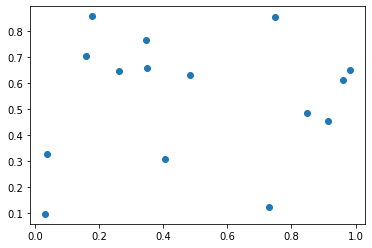

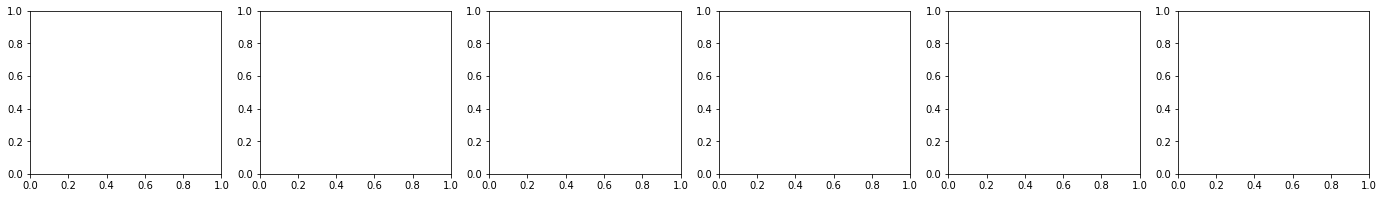

In [20]:
# Calculo matriz de adyacencia y grafo de la red
n = 15
x = np.random.rand(n)
y = np.random.rand(n)
X = np.vstack([x,y]).T
plt.scatter(x,y);
pos = {i:p for i,p in enumerate(zip(x,y))}

k = 5
# k +1 porque sumamos el item distancia 0.
f, axs = plt.subplots(1, k+1, figsize=(24,3))
min_non_0 = np.min(D[np.nonzero(D)])
ee = np.concatenate( ([0], np.linspace(min_non_0, D.max() * 0.8, k)))
for i, u in enumerate(ee):
  # Construir matriz de adyacencia
  A = D < u
  # Construir grafo 
  G = nx.from_numpy_array(A)
  # Plotear red
  nx.draw_networkx_nodes(G,pos=pos,ax=axs[i], node_size=100)
  nx.draw_networkx_edges(G,pos=pos,ax=axs[i])
  axs[i].tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)